## Сегментирование клиентов банка, склонных к оттоку

**Презентация** [ссылка для просмотра](https://drive.google.com/file/d/1AmYJgXn5s3X2bTRyOlIHj3ciMnk2c_ov/view?usp=sharing)  
**Дашборд** [ссылка для просмотра](https://public.tableau.com/app/profile/sergey7413/viz/Diplom_dashbord/sheet3)
  
Мы работаем аналитиком в банке  «Метанпромбанк».
В нашем банке возникла серьезная проблема — отток клиентов. Для дальнейшей борьбы с оттоком, маркетинговый отдел «Метанпромбанка» хочет узнать, какие сегменты клиентов наиболее склонны к оттоку из нашего банка. Наша задача — провести анализ имеющихся данных более 10 000 клиентов и подготовить план действий по удержанию клиентов.

## Цель проекта.

Провести анализ данных клиентской базы банка, сегментировать пользователей и предложить меры по снижению их оттока.

## Задачи проекта.

Во время исследования необходимо решить следующие задачи:

- Изучить исходные данные и провести их предобработку.
- Провести исследовательский анализ данных (EDA).
- Произвести кластеризацию и классификацию клиентов.
- Произвести сегментацию пользователей.
- Проверить статистические гипотезы.
- Сформулировать выводы и разработать рекомендации по повышению качества работы с клиентами.

## Описание данных.  

<div style="border:solid black 1px; padding: 20px">     
Имеется датафрейм со следующими данными:  

Структура bank_dataset.csv, среза клиентов на определенный момент времени:

• `userid` — идентификатор пользователя;  
• `score` — баллы кредитного скоринга;  
• `City` — город;  
• `Gender` — пол;  
• `Age` — возраст;  
• `Objects` — количество объектов в собственности;  
• `Balance` — баланс на счёте;  
• `Products` — количество продуктов, которыми пользуется клиент;  
• `CreditCard` — есть ли кредитная карта;  
• `Loyalty` — активный клиент;  
• `estimated_salary` — предполагаемая заработная плата клиента;  
• `Churn` — факт оттока.

# Импортируем библиотеки и изучим данные

In [1]:
import warnings
warnings.filterwarnings('ignore') #убираем вывод предупреждений

import pandas as pd
pd.set_option("display.precision", 2)
pd.options.display.max_colwidth = 100
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import math as mth
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
path = 'C:\\Users\\Sergey\\Documents\\Python Scripts\\Диплом\\'
try:
    df = pd.read_csv(path + 'bank_dataset.csv')
except:
    print('Loading Error')

In [3]:
NORM = '\033[0m'  # все атрибуты по умолчанию
BOLD = '\033[1m'  # жирный шрифт (интенсивный цвет)

#Напишем функцию для вывода основной информации о ДФ.
df_list = [df]
def full_info(df_list):
    for df in df_list:
        if len(df.index) > 10:
            print(BOLD+'\n Случайная выборка 10 строк датафрейма:')
            display (df.sample(n=10, random_state=10))
        else:
            print(BOLD+'\n Первые 10 строк датафрейма:')
            display (df.head(10))
        print(BOLD+'\n Типы данных и общая информация: \n'+NORM)
        display(df.info())
        print(BOLD+' Наличие дубликатов: '+NORM, df.duplicated().sum())
        print(BOLD+'\n Наличие пропусков: \n'+NORM)
        display(df.isna().sum())
        print(BOLD+'\n Статистики количественных переменных :')
        display(df.describe())
    return

In [4]:
full_info(df_list)


 Случайная выборка 10 строк датафрейма:


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
937,15704836,850,Ростов Великий,Ж,44,5,128605.32,1,0,1,171096.20,0
9355,15664606,739,Рыбинск,Ж,40,8,NaN,1,1,0,167030.51,0
2293,15844001,689,Рыбинск,Ж,45,0,57784.22,1,1,0,197804.00,1
192,15799586,479,Ярославль,М,40,1,NaN,2,0,0,114996.43,0
8675,15682001,714,Ярославль,М,54,7,126113.28,1,1,0,112777.38,0
53,15745034,655,Ростов Великий,М,41,8,125561.97,1,0,0,164040.94,1
9596,15797820,531,Ярославль,М,37,7,121854.45,1,1,0,147521.35,0
265,15855899,531,Рыбинск,Ж,36,9,99240.51,1,1,0,123137.01,0
984,15747506,773,Ярославль,М,25,1,124532.78,2,0,1,11723.57,0
9793,15815099,772,Ростов Великий,Ж,42,0,101979.16,1,1,0,90928.48,0



 Типы данных и общая информация: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


None

 Наличие дубликатов:  0

 Наличие пропусков: 



userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64


 Статистики количественных переменных :


,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.00e+04,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,1.57e+07,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,7.19e+04,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,1.56e+07,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,1.57e+07,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,1.57e+07,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.0
75%,1.58e+07,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,1.59e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


userid


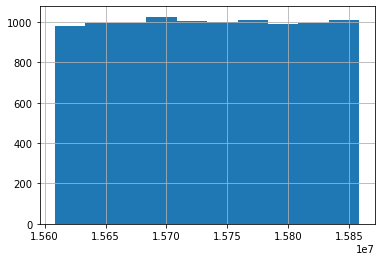

score


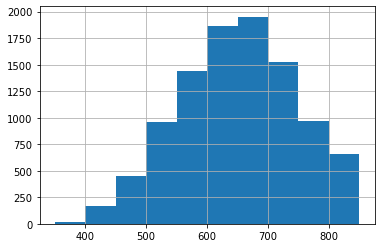

City


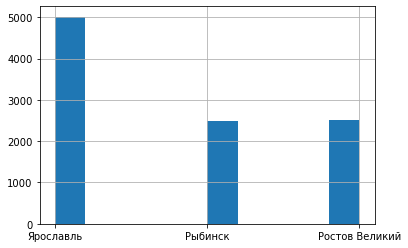

Gender


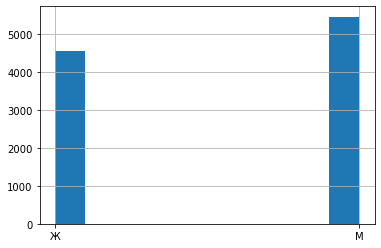

Age


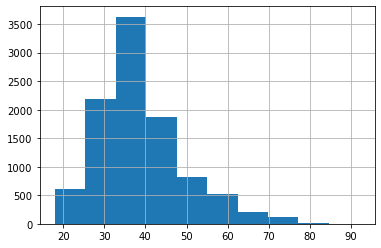

Objects


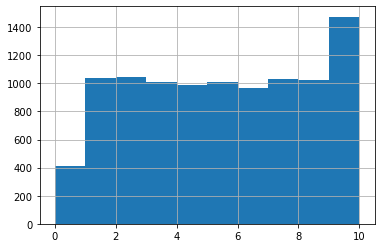

Balance


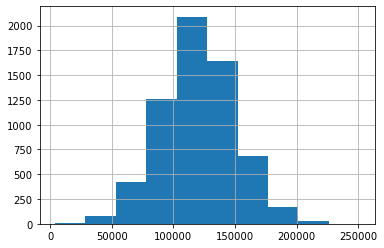

Products


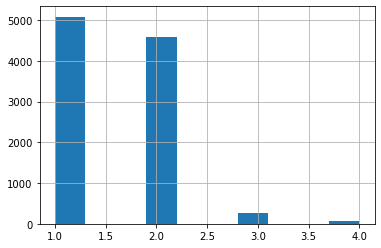

CreditCard


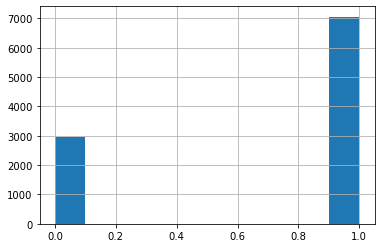

Loyalty


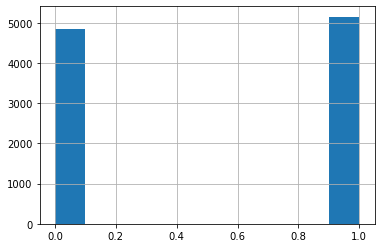

estimated_salary


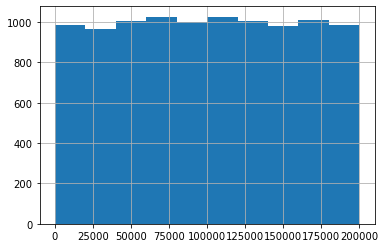

Churn


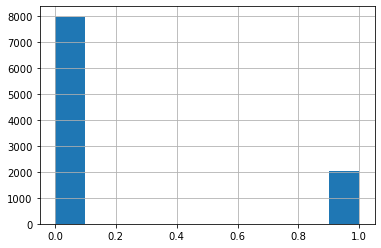

In [5]:
for i in df.columns:
    print(i)
    df[i].hist()
    plt.show()

## Вывод

<div style="border:solid green 2px; padding: 20px">
Данные изучены и готовы для дальнейшего исследования, т.к. ДФ в идеальном состоянии - дубликаты отсутствуют, типы данных верные. Учитывая квартили и логически анализируя жизненный опыт, можно сказать, что аномальных значений в ДФ не наблюдается, все они выглядят правдоподобно и естественно. Для удобства необходимо только заменить названия столбцов и обработать пропуска в столбце с балансом.
    
Если сравнить средние значения с медианами с учетом стандартного отклонения и посмотреть на гистограммы, можно увидеть, что клиенты по баллам кредитного скоринга, полу, возрасту, объектам в собственности, балансу на счете, активности и предполагаемой ЗП распределены равномерно. При этом, в Ярославле живет в два раза больше клиентов, чем в Рыбинске и Ростове Великом, почти по 50% у клиентов с 1-2 продуктами и по несколько процентов с 3-4 продуктами, кредитка есть у 70% клиентов, а отток составляет 20%.

# Предобработка данных

## Приведение названий столбцов к единой стилистике

In [6]:
df.columns = df.columns.str.lower()
df = df.rename(columns = {'userid': 'user_id', 'creditcard': 'credit_card'})
df.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

В связи с тем, что нас не интересует юнит-экономика, уберем неинформативный для нас столбец с номером юзера.

In [7]:
df = df.drop('user_id', axis=1)

## Обработка пропусков

score


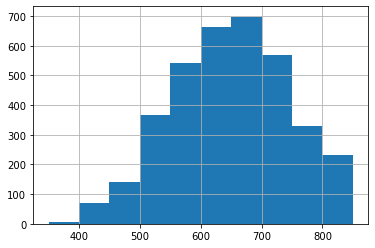

city


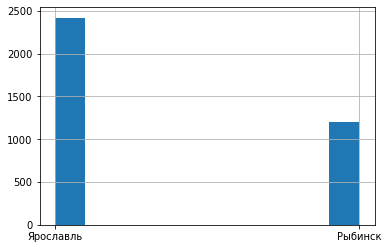

gender


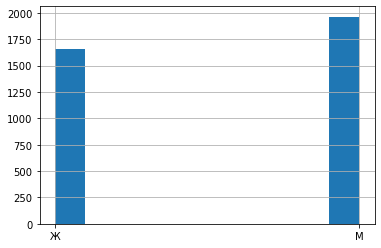

age


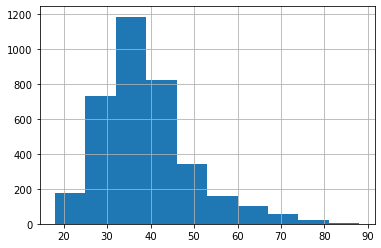

objects


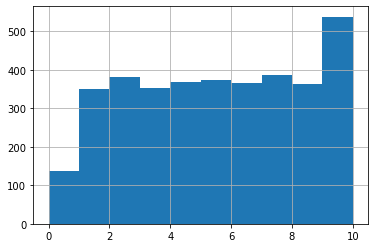

balance


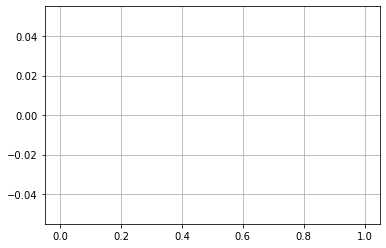

products


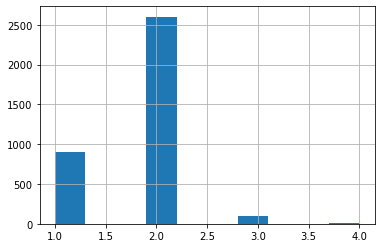

credit_card


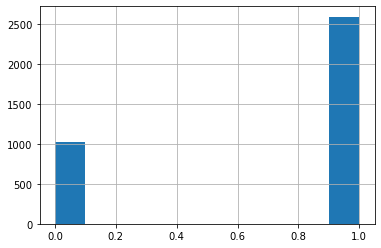

loyalty


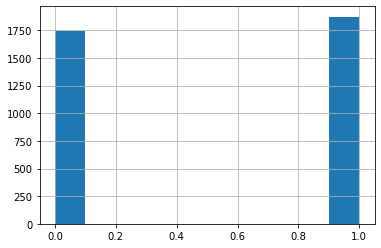

estimated_salary


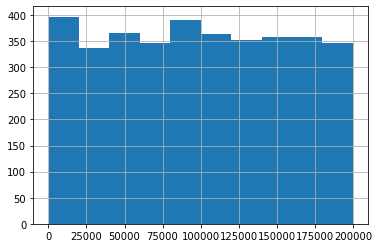

churn


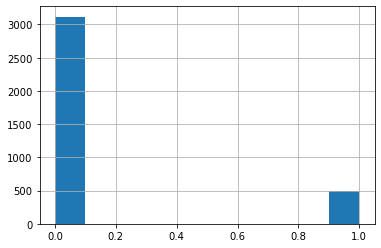

In [8]:
#Посмотрим на распределения пропусков.
for i in df.columns:
    print(i)
    df[df.balance.isna()][i].hist()
    plt.show()

Видим, что пропуски в балансе составляют половина клиентов Ярославля и Рыбинска, четверть клиентов с 1 продуктом и половина с двумя. В остальном изменений не наблюдается.
Возможно, пропуски в балансе вызваны какой-то программной ошибкой базы данных в этих городах или, что вероятнее, ошибкой при выгрузке данных. Посмотрим на значения баланса, исходя из выявленных закономерностей.

In [9]:
df.groupby(['city', 'products']).median()

score   age  objects    balance  credit_card  \
city           products                                                 
Ростов Великий 1         649.0  39.0      5.0  119961.48          1.0   
               2         653.5  37.0      5.0  119453.25          1.0   
               3         650.0  42.0      5.0  121012.65          1.0   
               4         636.0  44.0      4.0  118426.09          1.0   
Рыбинск        1         650.0  38.0      5.0  118905.73          1.0   
               2         652.0  36.0      5.0  120416.96          1.0   
               3         653.0  41.0      4.5  131355.30          1.0   
               4         671.0  50.0      5.0  121345.88          1.0   
Ярославль      1         653.0  37.0      5.0  120351.98          1.0   
               2         653.0  36.0      5.0  120157.89          1.0   
               3         643.5  43.0      5.0  108546.16          1.0   
               4         644.0  46.0      7.0  128548.49          1.0   

                         loyalty  estimated_salary  churn  
city           products                                    
Ростов Великий 1             0.0         101178.85    0.0  
               2             1.0         102768.95    0.0  
               3             0.0         104805.83    1.0  
               4             0.0         111578.61    1.0  
Рыбинск        1             1.0         100183.05    0.0  
               2             1.0         100365.51    0.0  
               3             0.0          97279.27    1.0  
               4             0.0          83866.35    1.0  
Ярославль      1             1.0          97350.40    0.0  
               2             1.0         100408.31    0.0  
               3             0.0         101626.54    1.0  
               4             1.0         128521.16    1.0

Очевидно, что при таком заполнении баланса будет сильный перекос в сторону значения 110-130к, равно как и заполнение любым другим конкретным значением, поэтому оставим этот столбец без изменений.

## Вывод

<div style="border:solid green 2px; padding: 20px">
Названия столбцов приведены к общей стилистике, пропуски оставлены без изменений во избежание внесения аномально большого количества определенных значений и изменения корреляции.

# Исследовательский анализ данных (EDA)

## Оценка средних значений признаков в двух группах

In [10]:
df.pivot_table(index='churn', aggfunc='mean')

,age,balance,credit_card,estimated_salary,loyalty,objects,products,score
churn,,,,,,,,
0,37.41,119535.86,0.71,99738.39,0.55,5.03,1.54,651.85
1,44.84,120746.97,0.70,101465.68,0.36,4.93,1.48,645.35


По средним значениям уже видно, что клиенты, склонные к оттоку, старше на 7 лет и из них активных в полтора раза меньше, чем активных из неушедших.

## Визуализация значений двух групп гистограммами и распределением признаков

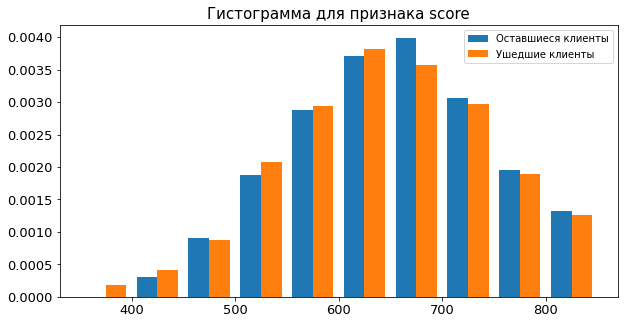

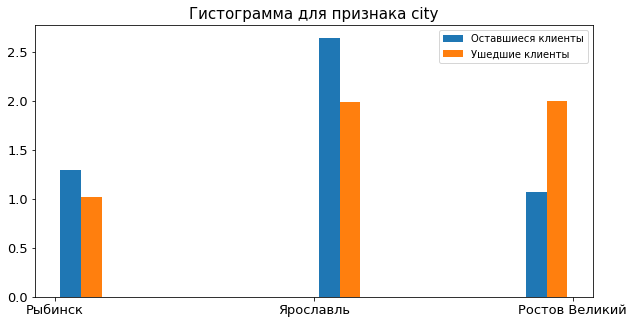

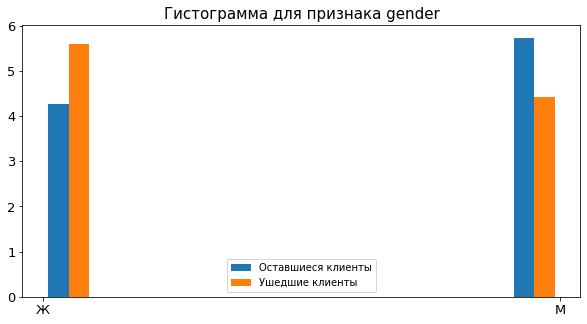

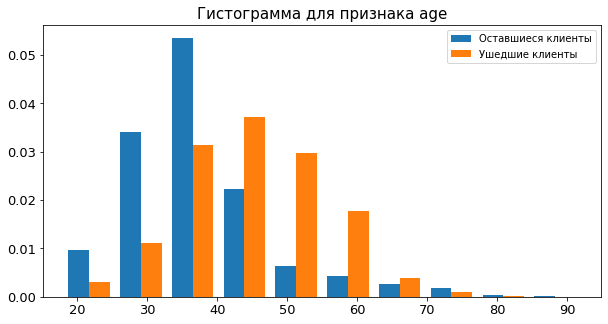

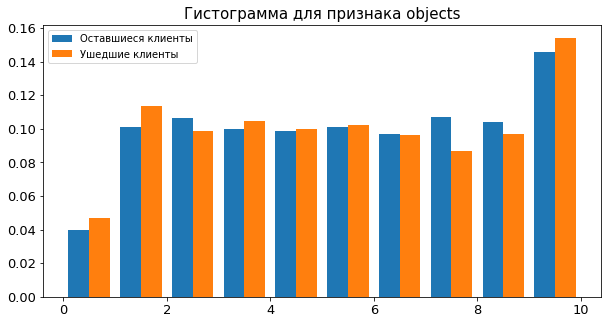

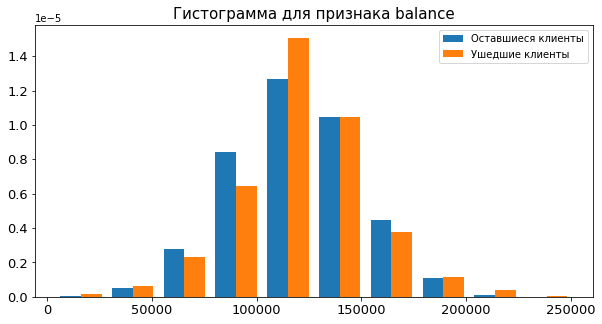

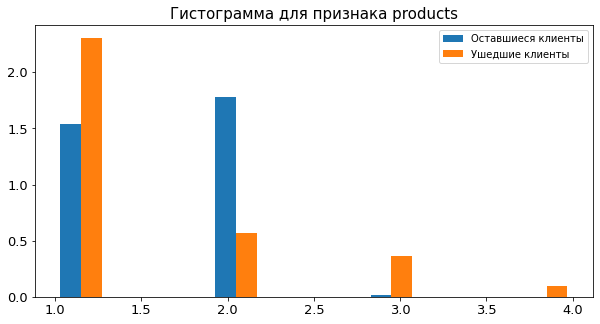

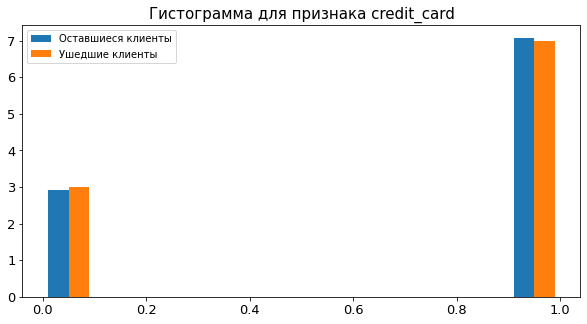

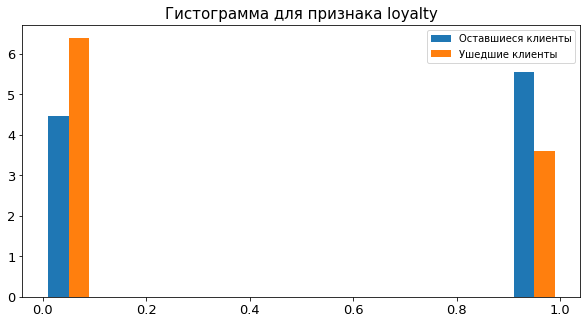

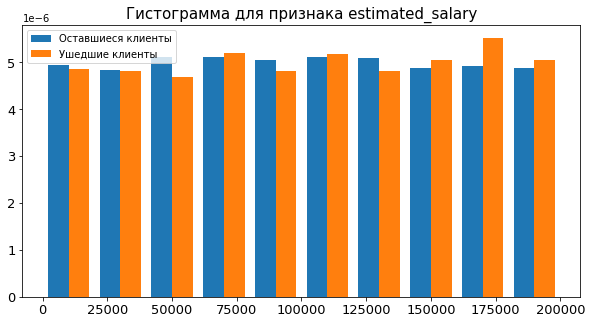

In [11]:
for i, col in enumerate(df.drop('churn', axis = 1).columns):
    plt.figure(figsize=(10, 5))
    plt.hist(x=[df.query('churn == 0')[col], df.query('churn == 1')[col]],
             stacked=False, bins = 10, density=True)
    plt.legend(['Оставшиеся клиенты', 'Ушедшие клиенты'])
    plt.title('Гистограмма для признака {}'.format(col), fontsize=15)
    plt.yticks(size = 13)
    plt.xticks(size = 13)
    plt.show()

По данным гистограммам можно увидеть, что по кредитному скорингу, количеству объектов, балансу, наличию кредитки и предполагаемой зарплаты в процентном соотношении оставшиеся и ушедшие клиенты распределены поровну.
При этом, явно выделяется Ростов Великий, клиенты в котором уходят значительно чаще, чем в двух других городах. Как уже было отмечено ранее, более возрастные клиенты (от 40 до 60) уходят значительно чаще. В разрезе продуктов значительно чаще уходят обладатели 3-4 продуктов, а так же значительный отток у владельцев одного продукта. При этом, наиболее постоянны владельцы двух продуктов. По активности вполне предсказуемо, что более активные клиенты менее склонны к оттоку. Так же имеется незначительно больший отток клиентов женского пола.

## Определение корреляции между признаками и оттоком и визуализация матрицы

In [12]:
df_ml = pd.get_dummies(df)
df_ml

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М
0,619,42,2,NaN,1,1,1,101348.88,1,0,0,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,1,0
3,699,39,1,NaN,2,0,0,93826.63,0,0,0,1,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,NaN,2,1,0,96270.64,0,0,0,1,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,0,1
9997,709,36,7,NaN,1,0,1,42085.58,1,0,0,1,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,0,0,1


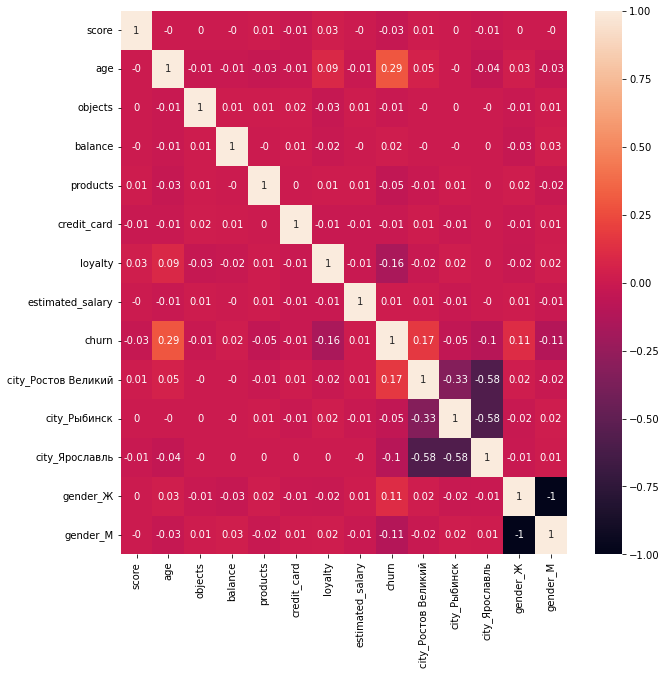

In [13]:
#вычисляем матрицу корреляций
cm = round(df_ml.corr(), 2)

#нарисуем тепловую карту с подписями для матрицы корреляций
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)
plt.show()

Как и было замечено ранее - имеется небольшая корреляция оттока с Ростовом Великим и женским полом, а также значительная с возрастом и незначительная обратная корреляция с Ярославлем и мужским полом, а также с активностью

## Вывод

<div style="border:solid green 2px; padding: 20px">
    
По средним значениям, гистограммам и матрице корреляции можно сделать следующие выводы:  
- **по кредитному скорингу, количеству объектов, балансу, наличию кредитки и предполагаемой зарплаты в процентном соотношении оставшиеся и ушедшие клиенты распределены поровну**  
- явно выделяется **Ростов Великий, клиенты в котором уходят значительно чаще,** чем в двух других городах  
- **более возрастные клиенты (от 40 до 60) уходят значительно чаще**  
- значительно **чаще уходят обладатели 3-4 продуктов**, а так же значительный отток у владельцев одного продукта,а наиболее постоянны владельцы двух продуктов  
- по активности вполне предсказуемо, что **более активные клиенты менее склонны к оттоку**  
- имеется незначительно больший отток клиентов женского пола

# Классификация и кластеризация пользователей

## Проведение классификации различными моделями

В связи с тем, что нам важнее не упустить склонного к оттоку клиента, чем обозначить таковым лояльного, при выборе лучшей модели приоритет следует отдать метрике *Recall*.  

В связи с тем, что в наших данных нет временной структуры и наши наблюдения не складываются в последовательный временной ряд,  используем метод случайного разбиения на обучающую и валидационную выборку.

Т.к. баланс не имеет корреляции с оттоком, для возможности корректной работы моделей удалим его из нашего ДФ.

In [14]:
df_ml = df_ml.drop('balance', axis=1)

In [15]:
#Разделим наши данные на признаки (матрица X) и целевую переменную (y).
X = df_ml.drop(columns=['churn'])
y = df_ml.churn

#Разделяем модель на обучающую и валидационную выборку.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

#Проверяем корректность разбиения на выборки.
sample = [X_train, X_test, y_train, y_test]
for i in sample:
    print(i.shape)

(8000, 12)
(2000, 12)
(8000,)
(2000,)


In [16]:
#Стандартизируем данные.
sc = StandardScaler()
X_train_st = sc.fit_transform(X_train)
X_test_st = sc.transform(X_test)

Для прогнозирования обучим модели логистической регрессии, случайного леса, дерева принятия решений и градиентного бустинга на train-выборке. Затем сделаем предсказания всеми моделями на валидационной выборке и посмотрим на метрики каждой.

In [17]:
#Зададим список моделей
models = [LogisticRegression, RandomForestClassifier, DecisionTreeClassifier, GradientBoostingClassifier]

#Напишем функцию, которая принимает на вход модель и данные и выводит метрики
def make_prediction(m, X_train_st, y_train, X_test_st, y_test):
    model = m(random_state=0)
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    probabilities = model.predict_proba(X_test_st)[:, 1]
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} ROC_AUC:{:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, probabilities)
        )
    )

In [18]:
#Используем цикл, который выводит метрики по списку моделей
for i in models:
    print(i())
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
Accuracy:0.81 Precision:0.59 Recall:0.23 F1:0.33 ROC_AUC:0.76
RandomForestClassifier()
Accuracy:0.85 Precision:0.73 Recall:0.44 F1:0.55 ROC_AUC:0.82
DecisionTreeClassifier()
Accuracy:0.78 Precision:0.46 Recall:0.47 F1:0.46 ROC_AUC:0.66
GradientBoostingClassifier()
Accuracy:0.85 Precision:0.75 Recall:0.42 F1:0.54 ROC_AUC:0.84


В связи с тем, что нам важнее не упустить склонного к оттоку клиента, чем обозначить таковым лояльного, попробуем посмотреть на наши модели со сниженным порогом вероятности отнесения к этой склонности и посмотрим на новые метрики.

In [19]:
#Напишем функцию, которая принимает на вход модель и данные и выводит метрики
def make_prediction2(m, X_train_st, y_train, X_test_st, y_test):
    model = m(random_state=0)
    model.fit(X_train_st, y_train)
    y_pred = model.predict(X_test_st)
    probabilities = model.predict_proba(X_test_st)[:, 1]
    #Зададим порог
    threshold = 0.35
    #На основании вероятностей и соотношения классов рассчитаем predict
    custom_predictions = [0 if i < threshold else 1 for i in probabilities]
    print(
        'Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} F1:{:.2f} ROC_AUC:{:.2f}'.format(
            accuracy_score(y_test, custom_predictions),
            precision_score(y_test, custom_predictions),
            recall_score(y_test, custom_predictions),
            f1_score(y_test, custom_predictions),
            roc_auc_score(y_test, probabilities)
        )
    )

In [20]:
#Используем цикл, который выводит метрики по списку моделей
for i in models:
    print(i())
    make_prediction2(i, X_train, y_train, X_test, y_test)

LogisticRegression()
Accuracy:0.78 Precision:0.43 Recall:0.26 F1:0.32 ROC_AUC:0.66
RandomForestClassifier()
Accuracy:0.82 Precision:0.57 Recall:0.56 F1:0.56 ROC_AUC:0.82
DecisionTreeClassifier()
Accuracy:0.78 Precision:0.45 Recall:0.47 F1:0.46 ROC_AUC:0.66
GradientBoostingClassifier()
Accuracy:0.85 Precision:0.66 Recall:0.54 F1:0.60 ROC_AUC:0.84


Видно, что лучше всех себя показала модель градиентного бустинга. Посмотрим на веса признаков в нем.

## Определение наиболее важных признаков

In [21]:
final_model = GradientBoostingClassifier(random_state=0)
final_model.fit(X_train_st, y_train)
importances = final_model.feature_importances_

In [22]:
df_imp = pd.DataFrame(data = final_model.feature_importances_,  
                  columns =['importances']) 
df_imp['name'] = df_ml.drop('churn', axis=1).columns.tolist()
df_imp.sort_values(by='importances', ascending=False)

,importances,name
1,4.35e-01,age
3,3.22e-01,products
5,1.16e-01,loyalty
7,5.09e-02,city_Ростов Великий
6,2.63e-02,estimated_salary
0,2.44e-02,score
10,1.20e-02,gender_Ж
2,6.62e-03,objects
11,5.29e-03,gender_М
9,1.16e-03,city_Ярославль


Классификация подтвердила найденные ранее инсайты - на отток больше всего влияет возраст, активность, проживание в городе Ростов Великий и количество продуктов.

## Определение количества кластеров по дендрограмме

In [23]:
#Cтандартизируем данные, исключив ненужные данные.
sc = StandardScaler()
x_sc = sc.fit_transform(df_ml.drop(columns=['churn']))

#Передадим получившуюся стандартизированную таблицу в качестве параметра функции linkage().
linked = linkage(x_sc, method = 'ward') 

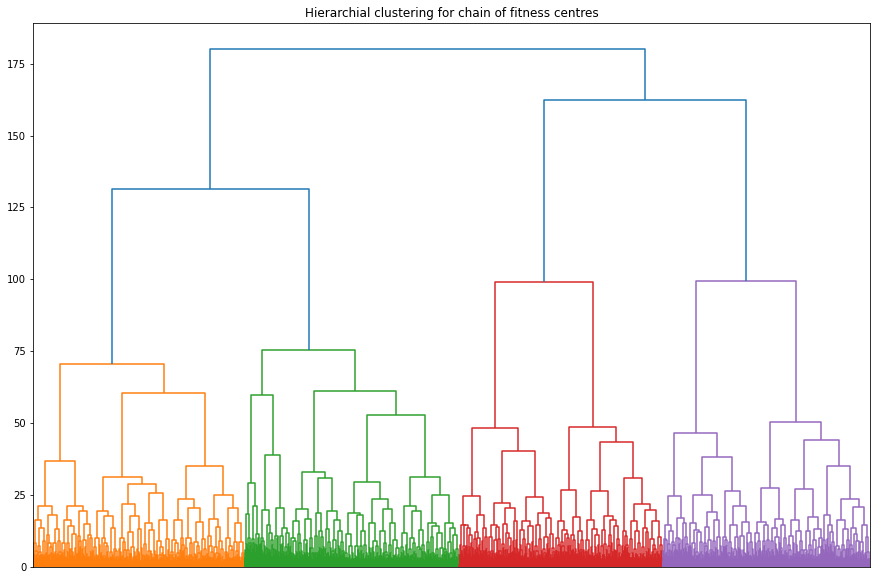

In [24]:
#Визуализируем как дендрограмму сохраненную в переменной linked таблицу «связок» между объектами 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchial clustering for chain of fitness centres')
plt.show() 

Видно, что по дендрограмме можно разбить всех пользователей на 4 кластера.
По полученной информации обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

## Проведение кластеризации

In [25]:
#Задаём модель k_means с числом кластеров 5 и фиксируем значение random_state
km = KMeans(n_clusters=4, random_state=0)
#Прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
labels = km.fit_predict(x_sc)

In [26]:
#Сохраняем метки кластера в поле нашего датасета
df_ml['cluster_clients'] = labels

# выводим статистику по средним значениям наших признаков по кластеру и количество клиентов в них
display(df_ml.groupby(['cluster_clients'])['churn'].count().reset_index())
df_ml.groupby(['cluster_clients']).mean().T

,cluster_clients,churn
0,0,2509
1,1,2261
2,2,2753
3,3,2477


cluster_clients,0,1,2,3
score,651.45,649.19,650.06,651.33
age,39.77,38.77,38.30,38.89
objects,5.01,4.95,5.05,5.03
products,1.52,1.55,1.52,1.54
credit_card,0.71,0.70,0.71,0.69
loyalty,0.50,0.51,0.52,0.53
estimated_salary,101113.44,99564.25,100174.25,99440.57
churn,0.32,0.20,0.13,0.17
city_Ростов Великий,1.00,0.00,0.00,0.00
city_Рыбинск,0.00,0.00,0.00,1.00


Видим, что с помощью МО образуется кластер клиентов с наибольшим оттоком по уже известным нам основным признакам - самым высоким средним возрастом и проживающим в Ростове Великом.

## Вывод

<div style="border:solid green 2px; padding: 20px">
    
Применив методы МО, можно сделать следующие выводы:  
- лучше всех себя показала **модель градиентного бустинга**
- по этой модели **на отток больше всего влияет возраст, активность, проживание в городе Ростов Великий и количество продуктов**
- используя дендрограмму, мы **определили 4 кластера клиентов**
- с помощью алгоритма K-Means мы разбили всех клиентов на 4 кластера, где образуется **кластер клиентов с наибольшим оттоком** по уже известным нам основным признакам - **самым высоким средним возрастом и проживающим в Ростове Великом**

# Сегментирование клиентов

## Выделение сегментов на основании ранее полученных результатов МО

Попробуем выделить сегменты, наиболее склонные к оттоку.

In [27]:
#Напишем функцию для выделения категорий клиентов по количеству продуктов, возрасту и проживанию в городах.
def groups(row):
    """
    Функция для сегментирования клиентов по возрасту (старше или моложе 40), 
    проживанию в Ростове Великом или другом городе и количеству продуктов (1-2 или 3-4)
    
    row - строка датафрейма
    """    
    if (row['age'] > 40).all() and (row['city_Ростов Великий'] == 1).all() and (row['products'] != [1, 2]).all():
        return 'Взрослый клиент с большим количеством продуктов из Ростова Великого'
    elif (row['age'] > 40).all() and (row['city_Ростов Великий'] != 1).all() and (row['products'] != [1, 2]).all():
        return 'Взрослый клиент с большим количеством продуктов не из Ростова Великого'
    elif (row['age'] > 40).all() and (row['city_Ростов Великий'] == 1).all() and (row['products'] != [3, 4]).all():
        return 'Взрослый клиент с небольшим количеством продуктов из Ростова Великого'
    elif (row['age'] > 40).all() and (row['city_Ростов Великий'] != 1).all() and (row['products'] != [3, 4]).all():
        return 'Взрослый клиент с небольшим количеством продуктов не из Ростова Великого'
    elif (row['age'] < 40).all() and (row['city_Ростов Великий'] != 1).all() and (row['products'] != [1, 2]).all():
        return 'Молодой клиент с большим количеством продуктов не из Ростова Великого'
    elif (row['age'] < 40).all() and (row['city_Ростов Великий'] != 1).all() and (row['products'] != [3, 4]).all():
        return 'Молодой клиент с небольшим количеством продуктов не из Ростова Великого'
    elif (row['age'] < 40).all() and (row['city_Ростов Великий'] == 1).all() and (row['products'] != [1, 2]).all():
        return 'Молодой клиент с большим количеством продуктов из Ростова Великого'
    elif (row['age'] < 40).all() and (row['city_Ростов Великий'] == 1).all() and (row['products'] != [3, 4]).all():
        return 'Молодой клиент с небольшим количеством продуктов из Ростова Великого'    

In [28]:
#Применяем нашу функцию и смотрим на результат.
df_ml['groups'] = df_ml.apply(groups, axis=1)
df_ml

,score,age,objects,products,credit_card,loyalty,estimated_salary,churn,city_Ростов Великий,city_Рыбинск,city_Ярославль,gender_Ж,gender_М,cluster_clients,groups
0,619,42,2,1,1,1,101348.88,1,0,0,1,1,0,1,Взрослый клиент с небольшим количеством продуктов не из Ростова Великого
1,608,41,1,1,0,1,112542.58,0,0,1,0,1,0,3,Взрослый клиент с небольшим количеством продуктов не из Ростова Великого
2,502,42,8,3,1,0,113931.57,1,0,0,1,1,0,1,Взрослый клиент с большим количеством продуктов не из Ростова Великого
3,699,39,1,2,0,0,93826.63,0,0,0,1,1,0,1,Молодой клиент с небольшим количеством продуктов не из Ростова Великого
4,850,43,2,1,1,1,79084.10,0,0,1,0,1,0,3,Взрослый клиент с небольшим количеством продуктов не из Ростова Великого
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,2,1,0,96270.64,0,0,0,1,0,1,2,Молодой клиент с небольшим количеством продуктов не из Ростова Великого
9996,516,35,10,1,1,1,101699.77,0,0,0,1,0,1,2,Молодой клиент с небольшим количеством продуктов не из Ростова Великого
9997,709,36,7,1,0,1,42085.58,1,0,0,1,1,0,1,Молодой клиент с небольшим количеством продуктов не из Ростова Великого
9998,772,42,3,2,1,0,92888.52,1,1,0,0,0,1,0,Взрослый клиент с небольшим количеством продуктов из Ростова Великого


In [29]:
(df_ml.pivot_table(index='groups', aggfunc={'churn': ['count', 'mean']})
 .sort_values(by=('churn', 'mean'), ascending=False)).style.format({('churn', 'mean'): '{:.2%}'})

Если не рассматривать небольшие группы (менее 1% от всей клиентуры), то интерес представляют две с оттоком, выше 20% по всей клиентуре:
- взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) из Ростова Великого (960 человек с оттоком 49%)
- взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) не из Ростова Великого (2419 человек с оттоком 28%)

## Вывод

<div style="border:solid green 2px; padding: 20px">
    
Используя полученные ранее инсайты, мы разделили всех клиентов на 8 групп и получили две критические:  
- **взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) из Ростова Великого (960 человек с оттоком 49%)**
- **взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) не из Ростова Великого (2419 человек с оттоком 28%)**

# Проверка статистических гипотез

## Доход ушедших и оставшихся клиентов различается

In [30]:
#Для начала посчитаем среднее нашей выборки.
df.pivot_table(index='churn', aggfunc={'estimated_salary': 'mean'})

,estimated_salary
churn,
0,99738.39
1,101465.68


В связи с тем, что распределение предполагаемой зарплаты не является нормальным, то для проверки этой гипотезы используем *непараметрический тест Уилкоксона-Манна-Уитни.* Этот непараметрические метод, не зависит от распределения данных и устойчив к выбросам.

Для этого сформируем нулевую и альтернативную гипотезу.  
**Нулевая H0:** вероятность того, что доход ушедших клиентов превышает доход оставшихся клиентов, равна 50%  
**Альтернативная H1:** вероятность того, что доход ушедших клиентов превышает доход оставшихся клиентов, не равна 50%

In [31]:
#Разделим на две выборки с ушедшими и оставшимися клиентами. 
churn = df.query('churn == 1')
remain = df.query('churn == 0')

In [32]:
#Посчитаем статистическую значимость различия конверсии с помощью теста Манна-Уитни. 
#Выведем p-value для сравнения дохода между группами.

alpha = .05 # критический уровень статистической значимости

p_val1 = st.mannwhitneyu(churn.estimated_salary, remain.estimated_salary)[1]

print(f'P-value составляет: {"{0:.5f}".format(p_val1)}')

if p_val1 < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

#Вычислим и выведем относительное различие в конверсии между группами
print('Относительная разница дохода составляет:',
      "{0:.3f}".format(churn.estimated_salary.mean() / remain.estimated_salary.mean() - 1))

P-value составляет: 0.22705
Не получилось отвергнуть нулевую гипотезу
Относительная разница дохода составляет: 0.017


P-value составляет 22% и значительно выше 5%, что означает, что отвергнуть нулевую гипотезу не получилось - по данным между доходом ушедших и оставшихся клиентов нет статистически значимого различия.  

Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно на 23%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии дохода между ушедшими и оставшимися клиентами.  
Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

## Баланс ушедших и оставшихся клиентов не различается

In [33]:
#Для начала посчитаем среднее нашей выборки.
df.pivot_table(index='churn', aggfunc={'balance': 'mean'})

,balance
churn,
0,119535.86
1,120746.97


Для выбора метода определения статистической значимости этих показателей проведем проверку распределений на нормальность. Для этого воспользуемся критерием Шапиро-Уилка.

In [34]:
#Напишем для этого функцию, определяющую p-value и проверяющую гипотезу о нормальном распределении.
def norm_test(df):
    alpha = .01 # критический уровень статистической значимости
    results = st.shapiro(df)
    p_value = results[1] # второе значение в массиве результатов (с индексом 1) - p-value
    print('p-значение: ', p_value)
    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: распределение не нормально")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, распределение нормально")

In [35]:
#Сделаем проверку баланса на нормальность.
norm_test(df.balance.dropna())

p-значение:  0.02963724359869957
Не получилось отвергнуть нулевую гипотезу, распределение нормально


Наши данные распределены нормально, значит мы можем использовать *t-критерий Стьюдента.* Для его использования необходимо устранить выбросы, но они у нас и так отсутствуют, а также удалить пропуска, поэтому приступим к проверке.

Для проверки этой гипотезы сформируем нулевую и альтернативную гипотезу.  
**Нулевая H0:** средний баланс выборки ушедших клиентов равен среднему балансу выборки оставшихся   
**Альтернативная H1:** средний баланс выборки ушедших клиентов не равен среднему балансу выборки оставшихся

In [36]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвегнем гипотезу

results = st.ttest_ind(churn.balance.dropna(), remain.balance.dropna())

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.16924734893322796
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно на 17%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии дохода между ушедшими и оставшимися клиентами.  
Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

## Доли ушедших клиентов в разных городах различаются  

Для проверки этой гипотезы будем использовать *z-критерий Фишера.*

**Нулевая H0:** доли ушедших клиентов в городе 1 и в городе 2 равны  
**Альтернативная H1:** доли ушедших клиентов в городе 1 и в городе 2 не равны  

In [37]:
df2 = df.pivot_table(index='churn', columns='city', aggfunc='sum').age
df2.loc['Total']= df2.sum()
df2

city,Ростов Великий,Рыбинск,Ярославль
churn,,,
0,63243,78100,156540
1,36544,18233,36558
Total,99787,96333,193098


In [38]:
#Напишем функцию для расчета статистической разницы между группами.
def difference(column_group1, column_group2, alpha):
    """
    Функция для проверки статистической гипотезы о равенстве долей
    
    column_group1 - выбор первого города
    column_group2 - выбор второго города
    alpha - заданный критический уровень статистической значимости
    """  
    events = df.index.tolist()
    
    alpha = alpha # критический уровень статистической значимости

    successes = np.array([df2.iat[1,column_group1], df2.iat[1,column_group2]])
    trials = np.array([df2.iat[2,column_group1], df2.iat[2,column_group2]])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  
    
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(
        p_combined * (1 - p_combined) * (1 / trials[0] + 1 / trials[1])
    )

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print(f'Отвергаем нулевую гипотезу:между долями ушедших клиентов в городе "{df2.columns.tolist()[column_group1]}" и в городе "{df2.columns.tolist()[column_group2]}" есть значимая разница'
        )
    else:
        print(f'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли ушедших клиентов в городе" {df2.columns.tolist()[column_group1]}" и в городе "{df2.columns.tolist()[column_group2]}" разными'
        ) 

In [39]:
difference(0, 2, .05)
difference (0, 1, .05)
difference (1, 2, .05)

p-значение:  0.0
Отвергаем нулевую гипотезу:между долями ушедших клиентов в городе "Ростов Великий" и в городе "Ярославль" есть значимая разница
p-значение:  0.0
Отвергаем нулевую гипотезу:между долями ушедших клиентов в городе "Ростов Великий" и в городе "Рыбинск" есть значимая разница
p-значение:  0.972637015488188
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли ушедших клиентов в городе" Рыбинск" и в городе "Ярославль" разными


## Вывод

<div style="border:solid green 2px; padding: 20px">
    
Используя различные статистические критерии и выдвинув несколько гипотез, мы получили следующие результаты:    
- вероятность получить такое или большее **различие дохода между ушедшими и оставшимися клиентами случайно на 17%**. Это явно слишком большая вероятность, чтобы делать вывод о статистически значимом различии 
- **между средним балансом выборки ушедших и средним балансом выборки оставшихся клиентов нет статистически значимого различия**  
-**между долями ушедших клиентов в городе "Ростов Великий" и в городах "Ярославль" и "Рыбинск" есть значимая разница, но нет оснований считать доли ушедших клиентов в городе "Рыбинск" и в городе "Ярославль" разными**

# Общий вывод и рекомендации

<div style="border:solid green 2px; padding: 20px">
Проведя исследование клиентов банка, можно сделать следующие выводы:
    
- ДФ в идеальном состоянии - дубликаты отсутствуют, типы данных верные. Учитывая квартили и логически анализируя жизненный опыт, можно сказать, что аномальных значений в ДФ не наблюдается, все они выглядят правдоподобно и естественно.
- если сравнить средние значения с медианами с учетом стандартного отклонения и посмотреть на гистограммы, можно увидеть, что клиенты по баллам кредитного скоринга, полу, возрасту, объектам в собственности, балансу на счете, активности и предполагаемой ЗП распределены равномерно. При этом, в Ярославле живет в два раза больше клиентов, чем в Рыбинске и Ростове Великом, почти по 50% у клиентов с 1-2 продуктами и по несколько процентов с 3-4 продуктами, кредитка есть у 70% клиентов, а отток составляет 20%.
    
    
- пропуски в балансе оставлены без изменений во избежание внесения аномально большого количества определенных значений и изменения корреляции.
    
    
- **по кредитному скорингу, количеству объектов, балансу, наличию кредитки и предполагаемой зарплаты в процентном соотношении оставшиеся и ушедшие клиенты распределены поровну**  
- явно выделяется **Ростов Великий, клиенты в котором уходят значительно чаще,** чем в двух других городах  
- **более возрастные клиенты (от 40 до 60) уходят значительно чаще**  
- значительно **чаще уходят обладатели 3-4 продуктов**, а так же значительный отток у владельцев одного продукта,а наиболее постоянны владельцы двух продуктов  
- по активности вполне предсказуемо, что **более активные клиенты менее склонны к оттоку**  
- имеется незначительно больший отток клиентов женского пола
    

- лучше всех себя показала **модель градиентного бустинга**
- по этой модели **на отток больше всего влияет возраст, активность, проживание в городе Ростов Великий и количество продуктов**
- используя дендрограмму, мы **определили 4 кластера клиентов**
- с помощью алгоритма K-Means мы разбили всех клиентов на 4 кластера, где образуется **кластер клиентов с наибольшим оттоком** по уже известным нам основным признакам - **самым высоким средним возрастом и проживающим в Ростове Великом**
    
    
- используя полученные ранее инсайты, мы разделили всех клиентов на 8 групп и получили две критические:    
 - **взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) из Ростова Великого (960 человек с оттоком 49%)**
 - **взрослый клиент (старше 40) с небольшим количеством продуктов (1-2) не из Ростова Великого (2419 человек с оттоком 28%)**
    
        
- вероятность получить такое или большее **различие дохода между ушедшими и оставшимися клиентами случайно на 17%**. Это явно слишком большая вероятность, чтобы делать вывод о статистически значимом различии  
- **между средним балансом выборки ушедших и средним балансом выборки оставшихся клиентов нет статистически значимого различия**  
-**между долями ушедших клиентов в городе "Ростов Великий" и в городах "Ярославль" и "Рыбинск" есть значимая разница, но нет оснований считать доли ушедших клиентов в городе "Рыбинск" и в городе "Ярославль" разными**
    
**Рекомендации по удержанию клиентов, склонных к оттоку из нашего банка:**     

- **произвести проверку работы персонала в филиалах Ростова Великого по качеству обслуживания клиентов**
- **произвести настройку интерфейса банковского приложения или десктопной версии в сторону его упрощения (или внести возможность выбора более простого интерфейса) для клиентов старшего поколения**
- **предоставлять персональных менеджеров возрастным клиентам для помощи с ориентацией в инфраструктуре банка**
- **ввести/расширить/упростить/доработать пенсионные программы банка**